<a href="https://colab.research.google.com/github/sherlockieee/cs156/blob/main/CS156_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from skimage.io import imread_collection
from skimage.transform import resize

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import decomposition


In [2]:
import os
os.chdir("/content/drive/My Drive/CS156/Assignment 4/")

## Uploading and splitting dataset

In [3]:
def preprocessing(path, img_length = 250, img_width = 250):
    dir = imread_collection(path + '/*')
    dir_resized = [resize(dir[i],(img_length,img_width), mode='constant', anti_aliasing=True, anti_aliasing_sigma=None) for i in range(len(dir))]
    return np.array(dir_resized)

men_arr = preprocessing('man_200')
women_arr = preprocessing('woman_200')

print(men_arr.shape)
print(women_arr.shape)

(249, 250, 250, 3)
(288, 250, 250, 3)


In [4]:
men_labels = np.zeros(len(men_arr))
women_labels = np.ones(len(women_arr))

X = np.concatenate((men_arr, women_arr), axis=0)
X = X.reshape(X.shape[0], np.product(X.shape[1:]))
y = np.concatenate((men_labels, women_labels), axis=0)


print(X.shape)
print(y.shape

(537, 187500)
(537,)


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify = y)

#split the training set further for valdiation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [6]:
kernels = ['linear', 'poly', 'rbf']
Cs = [1, 10, 100]
gammas = ['auto', 0.001, 0.01]

max_validation_accuracy = 0


for kernel in kernels:
    for C in Cs:
        for gamma in gammas:
            clf = SVC(gamma=gamma, kernel = kernel, C = C).fit(X_train, y_train)
      
            train_accuracy = np.mean(clf.predict(X_train) == y_train.T)
            val_accuracy = np.mean(clf.predict(X_val) == y_val.T)
            test_accuracy = np.mean(clf.predict(X_test) == y_test.T)
            if val_accuracy > max_validation_accuracy:
                max_validation_accuracyuracy = val_accuracy
                params = [kernel, C, gamma] 
                accuracy = [train_accuracy, val_accuracy, test_accuracy]



Best SVM parameters: kernel rbf, C: 100, gamma: 0.01
Train accuracy: 1.0
Validation accuracy: 0.5348837209302325
Test accuracy: 0.5370370370370371


In [7]:
kernel, C, gamma = params

print(f"Best SVM parameters: kernel {kernel}, C: {C}, gamma: {gamma}")
print(f"Train accuracy: {accuracy[0]}")
print(f"Validation accuracy: {accuracy[1]}")
print(f"Test accuracy: {accuracy[2]}")

Best SVM parameters: kernel rbf, C: 100, gamma: 0.01
Train accuracy: 1.0
Validation accuracy: 0.5348837209302325
Test accuracy: 0.5370370370370371


We see that the best SVM parameters are using the RBF kernel, with C = 100 and gamma = 0.01. Thus we would use this value for the rest of the comparison to ensure a fair result.


## Pricipal Component Analysis

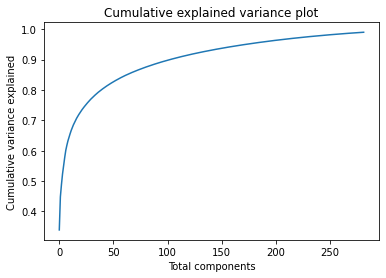

In [11]:
#perform PCA analysis with a high variance
#so that most of the data is explained
pca = decomposition.PCA(0.99)
pca.fit(X_train)

#Cumulative explained variance plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Total components')
plt.ylabel('Cumulative variance explained')
plt.title("Cumulative explained variance plot")
plt.show()

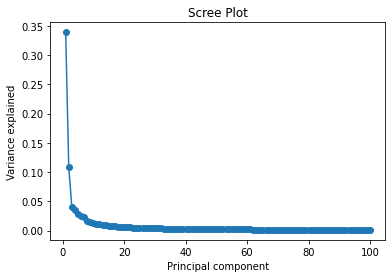

In [12]:
#Scree plot
PC_values = np.arange(1, 101)
plt.plot(PC_values, pca.explained_variance_ratio_[:100], 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.show()

In [13]:
print(f"10 components explain {np.sum(pca.explained_variance_ratio_[:10]) * 100:.2f}% variance")
print(f"50 components explain {np.sum(pca.explained_variance_ratio_[:50]) * 100:.2f}% variance")
print(f"100 components explain {np.sum(pca.explained_variance_ratio_[:100]) * 100:.2f}% variance")
print(f"200 components explain {np.sum(pca.explained_variance_ratio_[:200]) * 100:.2f}% variance")
print(f"300 components explain {np.sum(pca.explained_variance_ratio_[:300]) * 100:.2f}% variance")


10 components explain 64.47% variance
50 components explain 82.49% variance
100 components explain 89.69% variance
200 components explain 96.31% variance
300 components explain 99.01% variance


In [14]:
#Since 50 components explain roughly 83% of variances
pca = decomposition.PCA(n_components=50)
pca.fit(X_train)
#use PCA to reduce dimensions for X
pca_X_train = pca.transform(X_train)
pca_X_val = pca.transform(X_val)
pca_X_test = pca.transform(X_test)

In [16]:

clf = SVC(gamma=gamma, kernel = kernel, C = C).fit(pca_X_train, y_train)
      
pca_train_accuracy = np.mean(clf.predict(pca_X_train) == y_train.T)
pca_val_accuracy = np.mean(clf.predict(pca_X_val) == y_val.T)
pca_test_accuracy = np.mean(clf.predict(pca_X_test) == y_test.T)

print(f"Train accuracy: {pca_train_accuracy}")
print(f"Validation accuracy: {pca_val_accuracy}")
print(f"Test accuracy: {pca_test_accuracy}")


Train accuracy: 1.0
Validation accuracy: 0.5348837209302325
Test accuracy: 0.5370370370370371


## Linear Discriminant Analysis




In [18]:
lda = LinearDiscriminantAnalysis(n_components = 1)
lda.fit(X_train, y_train)

lda_X_train = lda.transform(X_train)
lda_X_val = lda.transform(X_val)
lda_X_test = lda.transform(X_test)

In [19]:
clf = SVC(gamma=gamma, kernel = kernel, C = C).fit(lda_X_train, y_train)
      
lda_train_accuracy = np.mean(clf.predict(lda_X_train) == y_train.T)
lda_val_accuracy = np.mean(clf.predict(lda_X_val) == y_val.T)
lda_test_accuracy = np.mean(clf.predict(lda_X_test) == y_test.T)

print(f"Train accuracy: {lda_train_accuracy}")
print(f"Validation accuracy: {lda_val_accuracy}")
print(f"Test accuracy: {lda_test_accuracy}")


Train accuracy: 0.8833819241982507
Validation accuracy: 0.5465116279069767
Test accuracy: 0.5925925925925926


### SVM with full dataset
- Train accuracy: 1.0
- Validation accuracy: 0.5348837209302325
- Test accuracy: 0.5370370370370371

### SVM with PCA
- Train accuracy: 1.0
- Validation accuracy: 0.5348837209302325
- Test accuracy: 0.5370370

### SVM with LDA
- Train accuracy: 0.8833819241982507
- Validation accuracy: 0.5465116279069767
- Test accuracy: 0.5925925925925926370370371


We see that there's no difference between support vector machines for the full dataset versus when we use principal component analysis for reduction of dimensions. This is somewhat counterintuitive because we would expect that PCA would potentially perform better because we reduce the variance/ noise of the model and potentially have better results.

Training with SVM & LDA is better than training with PCA and with full dataset (test accuracy of 0.59 vs 0.53). This is probably because LDA already creates a hyperplane that separates the two data best, which makes training SVM more accurate.

Lastly, all 3 methods significantly overfit the training data (SVM with full dataset and with PCA has a training accuracy of 1, in particular), thus we could probably have some improvement with the process. 



